In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Постройте классификатор грибов на съедобные, несъедобные и неизвестной съедобности.

Где чаще всего растут несъедобные грибы?

Какого цвета обычно съедобные грибы? Какого цвета почти не бывают?

### Предобработка

In [51]:
h = pd.read_csv("mushrooms.csv")

### Поиск различных типов грибов (Съедобные и нет)

In [52]:
cat1, cnt1 = np.unique(
        h["class"].values, return_counts = True
) ## различные типы грибов по возможности питания и их количества
cat1

array(['e', 'p'], dtype=object)

In [53]:
b1 = h["class"] == "p"
b2 = h["class"] == "e"
b3 = np.logical_and(np.logical_not(b1.values), np.logical_not(b2.values))
h[b3]
##Только съедобные и ядовитые

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [54]:
A = "class"
B = "habitat"


In [55]:
l, m, o, p= cat1[1], cat1[0], cnt1[1], cnt1[0]

In [56]:
print ("количество", l, "(несъедобных) равно", o)
print ("количество", m, "(съедобных) равно", p)

количество p (несъедобных) равно 3916
количество e (съедобных) равно 4208


<BarContainer object of 2 artists>

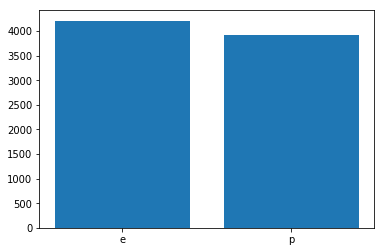

In [57]:
plt.bar(cat1,cnt1)
#e - съедобные, p - ядовитые

In [58]:
h1 = np.unique(h['class'].values)
h1

array(['e', 'p'], dtype=object)

In [60]:
from sklearn import tree
Y = [h1[0], h1[1]]
X = [[0], [1]]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [61]:
clf.predict([[1], [0], [0]])

array(['p', 'e', 'e'], dtype='<U1')

### Где чаще всего растут несъедобные грибы?

In [62]:
def perc(a, first, last):
    return(pd.crosstab(a[first], a[last])/a.shape[0]*100)


In [63]:
perc(h[h["class"] == "p"], A, B)
## считаем процент ядовитых в разных местах обитания

habitat,d,g,l,m,p,u
class,,,,,,
p,32.37998,18.896834,15.117467,0.919305,25.740552,6.945863


Самое большое количество ядовитых живет в d(woods) 

### Какого цвета обычно съедобные грибы? Какого цвета почти не бывают?

In [64]:
her = h[h['class'] == 'e']
c = "cap-color"
g = "gill-color"
pd.crosstab(her[g], her[c])/int(her.shape[0])*100

cap-color,b,c,e,g,n,p,r,u,w,y
gill-color,,,,,,,,,,
e,0.570342,0.000000,0.570342,0.000000,0.570342,0.570342,0.000000,0.000000,0.000000,0.000000
g,0.000000,0.000000,0.000000,1.425856,0.285171,0.000000,0.000000,0.000000,2.661597,1.520913
h,0.000000,0.000000,0.000000,1.520913,1.520913,0.000000,0.095057,0.095057,1.615970,0.000000
k,0.000000,0.000000,0.000000,1.806084,1.806084,0.000000,0.000000,0.000000,3.041825,1.520913
n,0.000000,0.000000,3.422053,5.228137,7.509506,0.000000,0.000000,0.000000,3.422053,2.661597
o,0.000000,0.000000,0.000000,0.000000,1.520913,0.000000,0.000000,0.000000,0.000000,0.000000
p,0.000000,0.000000,3.422053,6.368821,5.988593,0.000000,0.095057,0.095057,3.136882,1.140684
u,0.000000,0.000000,3.422053,3.422053,3.422053,0.000000,0.095057,0.095057,0.095057,0.000000
w,0.570342,0.760456,3.992395,4.752852,5.893536,0.760456,0.095057,0.095057,3.136882,2.661597


In [65]:
N1, T1 = np.unique(her[g].values, return_counts = True)
N2, T2 = np.unique(her[c].values, return_counts = True)

<BarContainer object of 10 artists>

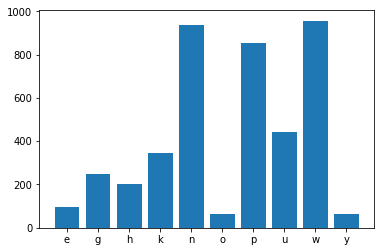

In [66]:
plt.bar(N1,T1)

<BarContainer object of 10 artists>

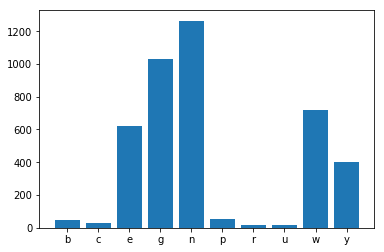

In [67]:
plt.bar(N2, T2)

Чаще всего встречаются грибы с cap-color "g" и gill-color "p" в объединении двух признаков

практически отсутствуют остальные типы 